# Artificial Neural Network

## Part 1 - Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
#from keras.models import load_model
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
from pathlib import Path

## Part 2 - Data Preprocessing

### Importing the dataset

In [28]:
#Access input folder
current_dir = Path.cwd()
parent_dir = current_dir.parent
input_dir1 = Path (parent_dir/"Pressure_profiles_arrival_omitted")
print ("input",input_dir1)

#Access folders inside input folder
input_dir2_train =  [folder_input for folder_input in input_dir1.iterdir() if folder_input.is_dir()]
print ("2",input_dir2_train)

input G:\Chamodi\Machine_Learning\Pressure_history_2\Pressure_profiles_arrival_omitted
2 [WindowsPath('G:/Chamodi/Machine_Learning/Pressure_history_2/Pressure_profiles_arrival_omitted/L13_1'), WindowsPath('G:/Chamodi/Machine_Learning/Pressure_history_2/Pressure_profiles_arrival_omitted/L13_11'), WindowsPath('G:/Chamodi/Machine_Learning/Pressure_history_2/Pressure_profiles_arrival_omitted/L13_13'), WindowsPath('G:/Chamodi/Machine_Learning/Pressure_history_2/Pressure_profiles_arrival_omitted/L13_15'), WindowsPath('G:/Chamodi/Machine_Learning/Pressure_history_2/Pressure_profiles_arrival_omitted/L13_17'), WindowsPath('G:/Chamodi/Machine_Learning/Pressure_history_2/Pressure_profiles_arrival_omitted/L13_19'), WindowsPath('G:/Chamodi/Machine_Learning/Pressure_history_2/Pressure_profiles_arrival_omitted/L13_21'), WindowsPath('G:/Chamodi/Machine_Learning/Pressure_history_2/Pressure_profiles_arrival_omitted/L13_23'), WindowsPath('G:/Chamodi/Machine_Learning/Pressure_history_2/Pressure_profiles_a

In [29]:
# Access each folder inside input folder
dataset_train = pd.DataFrame(columns = ['Charge_mass', 'Standoff_distance', 'Time', 'Pressure', 'Phase'])
df_list_train = []
for folder_train in input_dir2_train:
    
    # Make a list of data file names
    files_train = list(file_train for file_train in folder_train.rglob("*.xlsx") if 2 < int(file_train.stem[1:]) < 14)
    print ("folder", folder_train)
    
    for file_train in files_train:
        df_list_train.append(pd.read_excel(file_train))
        print (file_train.stem)

dataset_train = pd.concat(df_list_train, ignore_index = True)

folder G:\Chamodi\Machine_Learning\Pressure_history_2\Pressure_profiles_arrival_omitted\L13_1
P13
P5
P9
folder G:\Chamodi\Machine_Learning\Pressure_history_2\Pressure_profiles_arrival_omitted\L13_11
P13
P5
P9
folder G:\Chamodi\Machine_Learning\Pressure_history_2\Pressure_profiles_arrival_omitted\L13_13
P13
P5
P9
folder G:\Chamodi\Machine_Learning\Pressure_history_2\Pressure_profiles_arrival_omitted\L13_15
P13
P5
P9
folder G:\Chamodi\Machine_Learning\Pressure_history_2\Pressure_profiles_arrival_omitted\L13_17
P13
P5
P9
folder G:\Chamodi\Machine_Learning\Pressure_history_2\Pressure_profiles_arrival_omitted\L13_19
P13
P5
P9
folder G:\Chamodi\Machine_Learning\Pressure_history_2\Pressure_profiles_arrival_omitted\L13_21
P13
P5
P9
folder G:\Chamodi\Machine_Learning\Pressure_history_2\Pressure_profiles_arrival_omitted\L13_23
P13
P5
P9
folder G:\Chamodi\Machine_Learning\Pressure_history_2\Pressure_profiles_arrival_omitted\L13_25
P13
P5
P9
folder G:\Chamodi\Machine_Learning\Pressure_history_2\Pr

In [30]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365320 entries, 0 to 365319
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Charge_mass        365320 non-null  float64
 1   Standoff_distance  365320 non-null  int64  
 2   Time               365320 non-null  float64
 3   Pressure           365320 non-null  float64
 4   Phase              365320 non-null  object 
dtypes: float64(3), int64(1), object(1)
memory usage: 13.9+ MB


In [31]:
dataset_train = pd.get_dummies(dataset_train, columns =['Phase'], dtype = np.uint8)
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365320 entries, 0 to 365319
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Charge_mass        365320 non-null  float64
 1   Standoff_distance  365320 non-null  int64  
 2   Time               365320 non-null  float64
 3   Pressure           365320 non-null  float64
 4   Phase_negative     365320 non-null  uint8  
 5   Phase_positive     365320 non-null  uint8  
dtypes: float64(3), int64(1), uint8(2)
memory usage: 11.8 MB


In [32]:
dataset_train.head(30)

,Charge_mass,Standoff_distance,Time,Pressure,Phase_negative,Phase_positive
0,0.5,7,0.01588,113668.39844,0,1
1,0.5,7,0.01589,113057.68750,0,1
2,0.5,7,0.01590,113399.80469,0,1
3,0.5,7,0.01591,113217.99219,0,1
4,0.5,7,0.01592,113204.15625,0,1
5,0.5,7,0.01593,113132.22656,0,1
6,0.5,7,0.01594,113051.35156,0,1
7,0.5,7,0.01595,113006.08594,0,1
8,0.5,7,0.01596,112929.44531,0,1
9,0.5,7,0.01597,112869.72656,0,1


In [33]:
y = dataset_train['Pressure']
X = dataset_train.drop(['Pressure'], axis=1)
print(X.shape, y.shape)

(365320, 5) (365320,)


In [34]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

### Splitting the dataset into the Training set and Test set

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 0)

In [36]:
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size = 0.5,
                                                random_state = 0)

## Feature scaling

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,0:3] = sc.fit_transform(X_train[:, 0:3])
print (X_train)

[[-1.9215324  -1.25843172 -0.75775388  1.          0.        ]
 [ 1.34003331 -0.03361115 -0.1396086   1.          0.        ]
 [-1.41191276 -0.03361115  0.51024511  1.          0.        ]
 ...
 [ 0.01502224  1.19120942  0.32091329  1.          0.        ]
 [-0.39267348 -0.03361115  1.27366789  1.          0.        ]
 [ 1.23810938 -1.25843172 -0.58252938  1.          0.        ]]


In [38]:
X_test[:,0:3] = sc.transform(X_test[:,0:3])
print (X_test)

[[-1.51383669 -1.25843172 -1.4384369   1.          0.        ]
 [ 0.93233759 -0.03361115 -0.28137247  1.          0.        ]
 [ 1.4929192  -1.25843172 -1.74927581  0.          1.        ]
 ...
 [-0.39267348 -1.25843172 -1.07916175  1.          0.        ]
 [ 1.44195724 -1.25843172  0.27953943  1.          0.        ]
 [-1.51383669 -0.03361115  0.22406506  1.          0.        ]]


In [39]:
X_val[:,0:3] = sc.transform(X_val[:,0:3])
print (X_val)

[[-0.90229312 -0.03361115 -0.04186632  1.          0.        ]
 [-0.08690169 -0.03361115 -1.13552477  1.          0.        ]
 [ 0.42271795 -0.03361115 -0.11408368  1.          0.        ]
 ...
 [-1.10614097 -0.03361115 -1.07036259  1.          0.        ]
 [-1.10614097 -0.03361115 -0.79651552  1.          0.        ]
 [ 0.72848974 -1.25843172 -0.2400055   1.          0.        ]]


In [40]:
print ("X_train", len(X_train))
print ("X_test", len(X_test))
print ("X_val", len(X_val))

X_train 219192
X_test 73064
X_val 73064


## Part 3 - Building the ANN

In [ ]:
from tensorflow.keras.Model import Sequential
#from tensorflow.keras.layers import Dense

### Initializing the ANN

In [41]:
ann = tf.keras.models.Sequential()

### Adding the input layers

In [42]:
ann.add(tf.keras.layers.Dense(units=200,
                              input_shape=(X_train.shape[1],),
                              activation='leaky_relu'))

In [43]:
ann.add(tf.keras.layers.Dense(units=150,
                              input_shape=(X_train.shape[1],),
                              activation='leaky_relu'))

In [44]:
ann.add(tf.keras.layers.Dense(units=125,
                              input_shape=(X_train.shape[1],),
                              activation='leaky_relu'))

In [45]:
ann.add(tf.keras.layers.Dense(units=100,
                              activation='leaky_relu'))

### Adding the output layer

In [46]:
ann.add(tf.keras.layers.Dense(units=1,
                              activation='linear'))

### what model looks like

In [47]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 200)               1200      
                                                                 
 dense_6 (Dense)             (None, 150)               30150     
                                                                 
 dense_7 (Dense)             (None, 125)               18875     
                                                                 
 dense_8 (Dense)             (None, 100)               12600     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 62,926
Trainable params: 62,926
Non-trainable params: 0
_________________________________________________________________


## Part 4 - Training the ANN

### Compiling the ANN

In [48]:
# from tensorflow.keras.optimizers import Adam
from keras.optimizers import Adam
opt = Adam(learning_rate=0.01)
ann.compile(optimizer = opt,
            loss = 'mean_squared_error',
            metrics = ['mae'])

### early stopping callback

In [49]:
# protects from unnecessary further training of the model if a particular metric does not continue to improve over a number of n epochs. In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

### Training the ANN model on the Training set

In [50]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    callbacks=[es],
                    epochs=400,
                    batch_size=50,
                    verbose=1)

Epoch 1/400
4384/4384 [==============================] - 33s 7ms/step - loss: 786624256.0000 - mae: 11206.0498 - val_loss: 672523648.0000 - val_mae: 8452.1709
Epoch 2/400
4384/4384 [==============================] - 27s 6ms/step - loss: 586377792.0000 - mae: 8730.1182 - val_loss: 633662784.0000 - val_mae: 10592.2373
Epoch 3/400
4384/4384 [==============================] - 27s 6ms/step - loss: 459301152.0000 - mae: 8153.8755 - val_loss: 433336864.0000 - val_mae: 6808.5020
Epoch 4/400
4384/4384 [==============================] - 27s 6ms/step - loss: 348571616.0000 - mae: 7283.2207 - val_loss: 161381648.0000 - val_mae: 4357.6689
Epoch 5/400
4384/4384 [==============================] - 27s 6ms/step - loss: 289744576.0000 - mae: 6335.2363 - val_loss: 207368848.0000 - val_mae: 5242.4780
Epoch 6/400
4384/4384 [==============================] - 27s 6ms/step - loss: 309753344.0000 - mae: 6234.4185 - val_loss: 188079200.0000 - val_mae: 5013.3032
Epoch 7/400
4384/4384 [===========================

### Analyse learn history

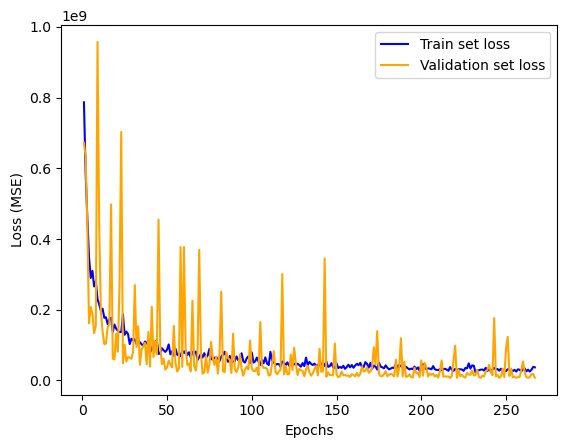

In [51]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'blue', label='Train set loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation set loss')
#plt.title('Training and testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

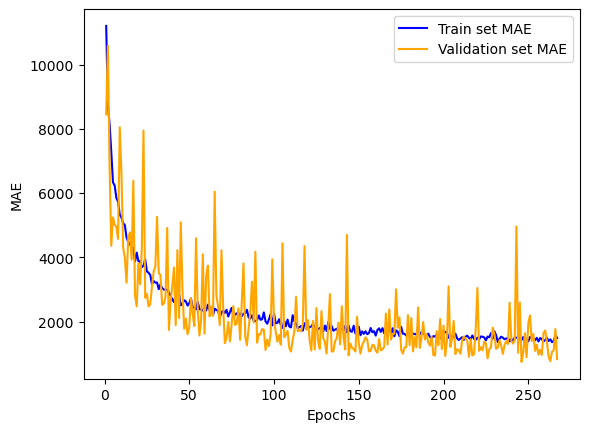

In [52]:
loss_values1 = history_dict['mae'] # you can change this
val_loss_values1 = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values1, 'blue', label='Train set MAE')
plt.plot(epochs, val_loss_values1, 'orange', label='Validation set MAE')
#plt.title('Training and testing MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [ ]:
print (epochs)

### Save the model

In [ ]:
ann.save('ANN_13.h5')
import pickle
pickle.dump(sc, open('scaler_ANN.pkl', 'wb'))

## Part 5 - Make predictions

In [ ]:
ann = load_model('ANN_13.h5')
sc = pickle.load(open('scaler_ANN.pkl', 'rb'))

2284/2284 [==============================] - 5s 2ms/step


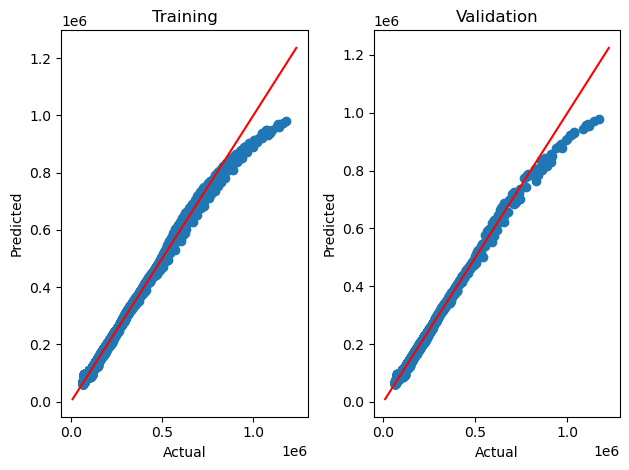

In [53]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_val, y=ann.predict(X_val)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [54]:
y_pred = ann.predict(X_test)
y_pred_e = y_pred/1000
y_test_e = y_test/1000
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_e.reshape(len(y_pred_e),1), y_test_e.reshape(len(y_test_e),1)),1))

2284/2284 [==============================] - 5s 2ms/step
[[ 75.25  74.26]
 [ 86.58  86.  ]
 [ 99.5  102.53]
 ...
 [ 90.92  90.13]
 [ 93.39  93.47]
 [ 99.81 100.1 ]]


Text(0, 0.5, 'Predicted data')

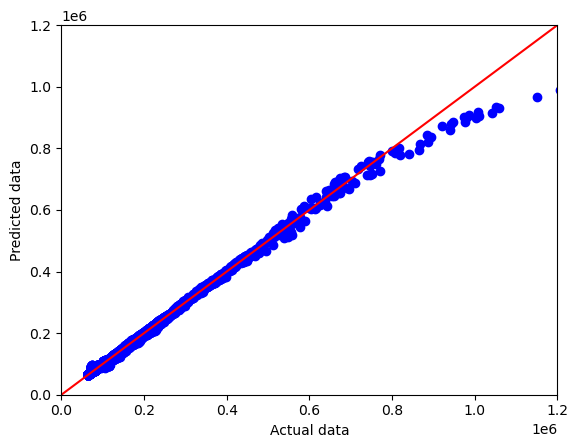

In [55]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
plt.plot ([0,1200000],[0,1200000], color = "red")
plt.axis ([0,1200000,0,1200000])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

In [ ]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (9, 9))
b_l = 60
u_l = 300

# Add scatterplot
ax1.scatter(y_test_e, y_pred_e, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')


plt.ylabel('Predicted Incident Pressure (kPa)',fontsize = 25)
plt.xlabel('Actual Incident Pressure (kPa)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


x1 = np.linspace(b_l, u_l)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.05*x1, '--m', label='\u00B15% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.95*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.1*x1, '-.g', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'-.g',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, color = '#F97306', linestyle='dotted', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,color = '#F97306', linestyle='dotted', lw=2.5,alpha=0.7)

plt.ylim(b_l, u_l)
plt.xlim(b_l, u_l)
plt.legend(loc='upper left',fontsize = 21)

plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red


In [ ]:
# metrics
trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

In [ ]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

In [ ]:
count0 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.95*y_test[i]
    line2 = y_pred[i] - 1.05*y_test[i]
    mask0 = (line1 > 0) & (line2 < 0)
    count0 = np.sum(mask0+count0)

count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    mask1 = (line1 > 0) & (line2 < 0)
    count1 = np.sum(mask1+count1)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 5% margin', format((count0/len (y_pred)),'.2%'))
print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

In [ ]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

In [ ]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test_e, y_pred_e))

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test_e, y_pred_e)